In [18]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [19]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [20]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [21]:
def trend_correlation_factor(df, window=20):
    """
    使用Pandas TA的线性回归斜率作为趋势因子
    """
    # 计算线性回归斜率
    slope = ta.linreg(df['close'], length=window, slope=True)
    return slope

In [22]:
evaluator.set_factor(
    factor_data_or_func=trend_correlation_factor,
    factor_name='trend_correlation_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.000893
   Rank_IC (Spearman): -0.028960
📊 信息比率:
   IR: 0.104610
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130631
   因子列: trend_correlation_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


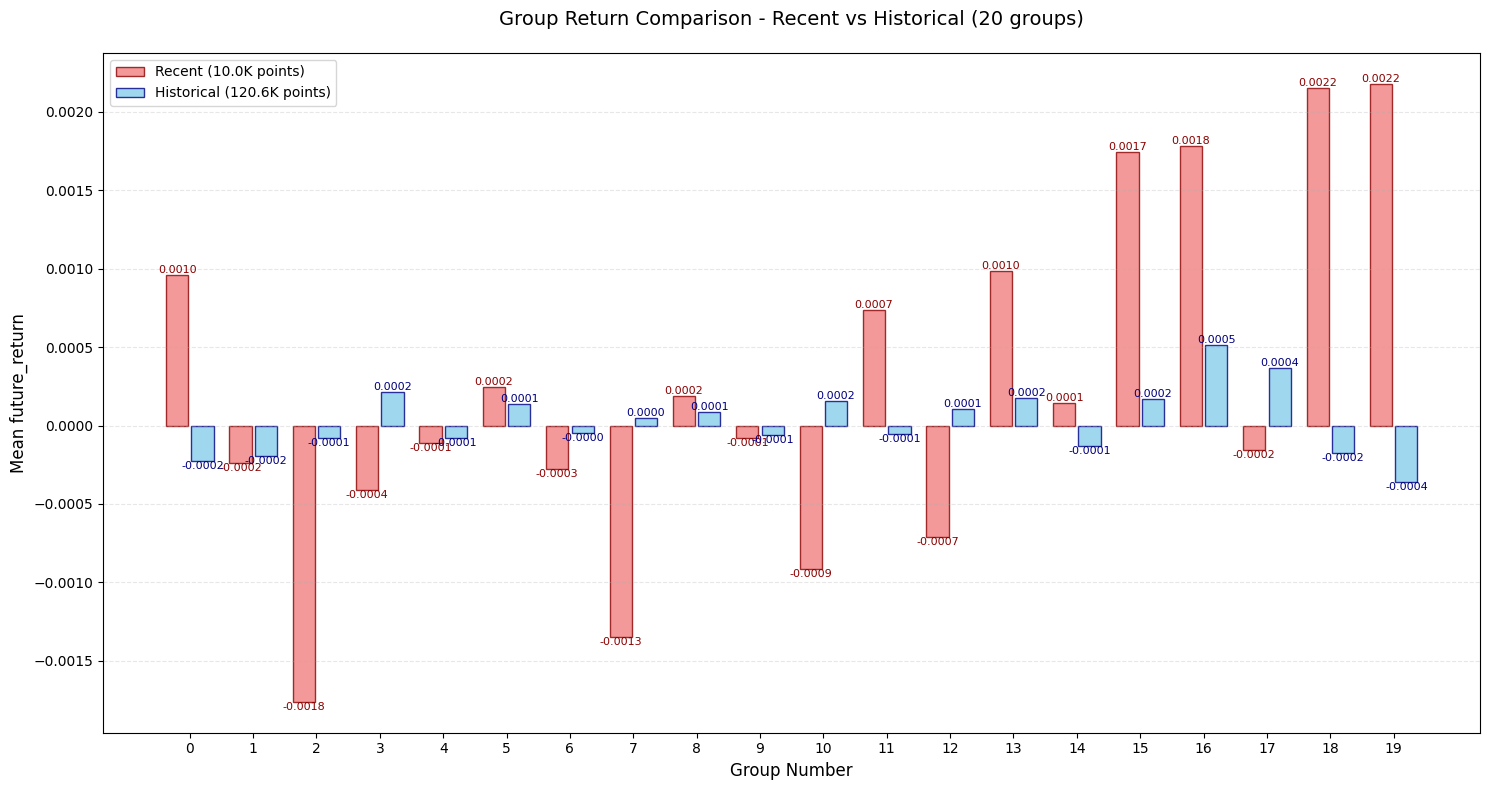

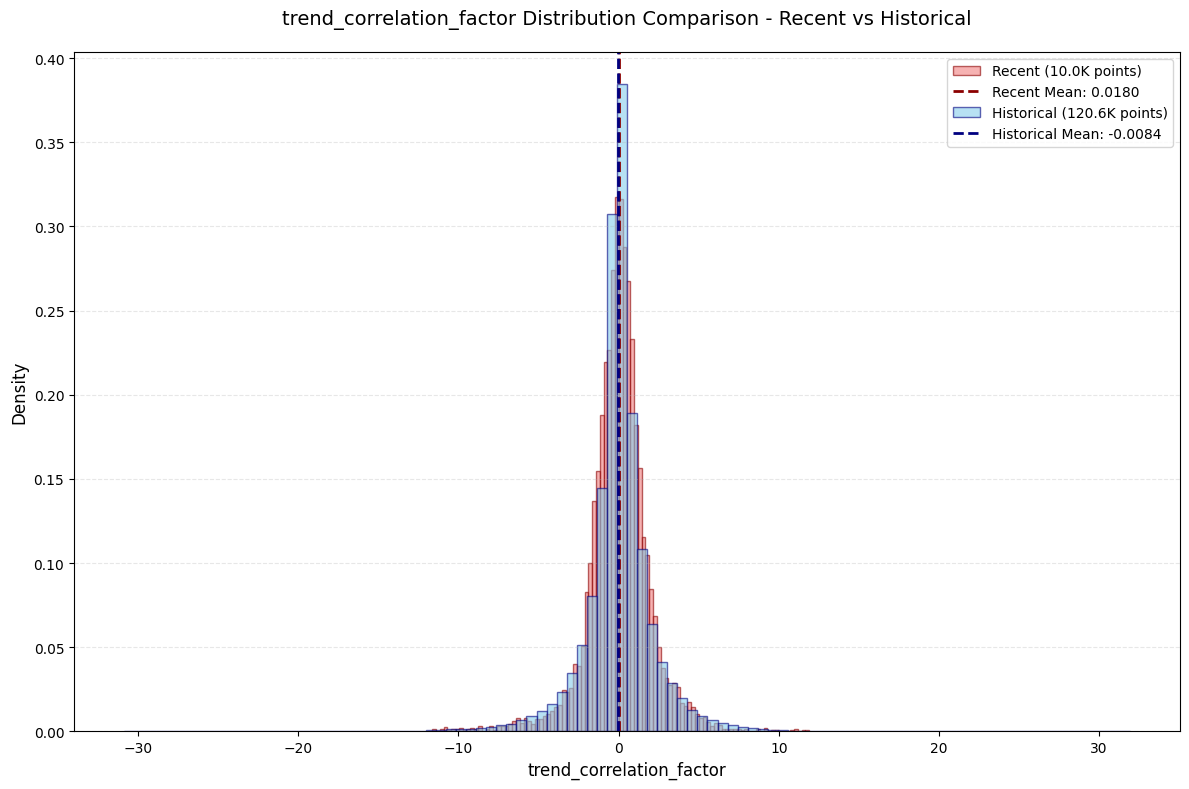

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [23]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)